<a href="https://colab.research.google.com/github/lcommons/portfolio/blob/master/policeshootings/PoliceShootingsV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analysis of fatal police shootings

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [34]:
#data = pd.read_csv('fatal-police-shootings-data.csv')
data = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v2/fatal-police-shootings-data.csv')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10059 entries, 0 to 10058
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10059 non-null  int64  
 1   date                        10059 non-null  object 
 2   threat_type                 9990 non-null   object 
 3   flee_status                 8674 non-null   object 
 4   armed_with                  9848 non-null   object 
 5   city                        9986 non-null   object 
 6   county                      5359 non-null   object 
 7   state                       10059 non-null  object 
 8   latitude                    8956 non-null   float64
 9   longitude                   8956 non-null   float64
 10  location_precision          8956 non-null   object 
 11  name                        9743 non-null   object 
 12  age                         9700 non-null   float64
 13  gender                      100

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10059 entries, 0 to 10058
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          10059 non-null  int64  
 1   date                        10059 non-null  object 
 2   threat_type                 9990 non-null   object 
 3   flee_status                 8674 non-null   object 
 4   armed_with                  9848 non-null   object 
 5   city                        9986 non-null   object 
 6   county                      5359 non-null   object 
 7   state                       10059 non-null  object 
 8   latitude                    8956 non-null   float64
 9   longitude                   8956 non-null   float64
 10  location_precision          8956 non-null   object 
 11  name                        9743 non-null   object 
 12  age                         9700 non-null   float64
 13  gender                      100

In [37]:
data.describe()

,id,latitude,longitude,age
count,10059.000000,8956.000000,8956.000000,9700.000000
mean,5521.537529,36.639723,-96.916971,37.420103
std,3126.567957,5.368923,16.381834,12.925098
min,3.000000,19.497503,-160.006944,2.000000
25%,2811.500000,33.451519,-111.970513,28.000000
50%,5553.000000,36.069045,-94.251471,35.000000
75%,8236.500000,40.040239,-83.131228,45.000000
max,10909.000000,71.301255,-67.867166,92.000000


This tells us that most of the data in this dataset is categorical, and will need to be converted to numerical values to be useful.
First, lets break the date into year, month and day columns:

In [38]:
dateUhFrame = data['date'].str.split('-',expand=True)
data['year'] = dateUhFrame[0]
data['month'] = dateUhFrame[1]
data['day'] = dateUhFrame[2]

#data['year'] = data['date'].str.split('-',expand=True)[0]
#data['month'] = data['date'].str.split('-',expand=True)[1]
#data['day'] = data['date'].str.split('-',expand=True)[2]

In [39]:
data.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,...,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids,year,month,day
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,...,53.0,male,A,not_available,True,False,73,2015,01,02
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,...,47.0,male,W,not_available,False,False,70,2015,01,02
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,...,23.0,male,H,not_available,False,False,238,2015,01,03
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,...,32.0,male,W,not_available,True,False,196,2015,01,04
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,...,39.0,male,H,not_available,False,False,473,2015,01,04


### Let's start to analyse the data
#### What does the data look like from year to year?

<Axes: xlabel='year', ylabel='count'>

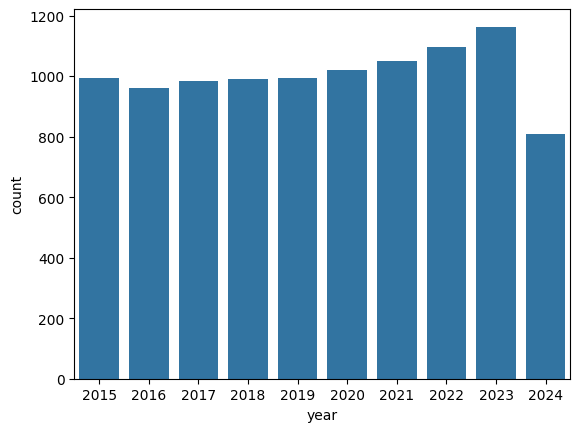

In [40]:
sns.countplot(data=data,x='year')

There is not much variation from year to year.


#### How about from month to month over the years?

<Axes: xlabel='month', ylabel='count'>

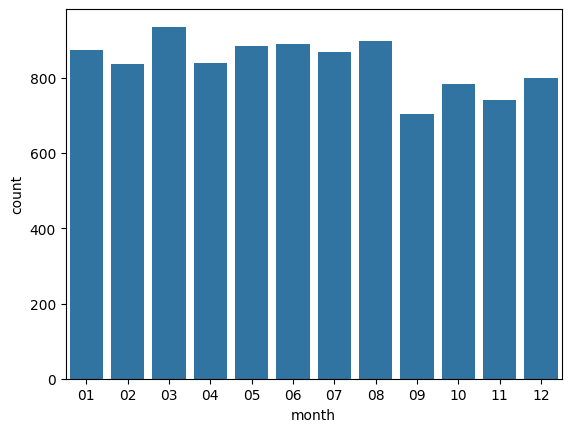

In [41]:
sns.countplot(data=data,x='month')

It looks like there might be some monthly patterns here. A peak in the summer? Decline in autumn? But what's going on in early spring?

Maybe we should ask how consistent is the monthly data from year to year? Is one month consistently high or low? Or do they vary from year to year?

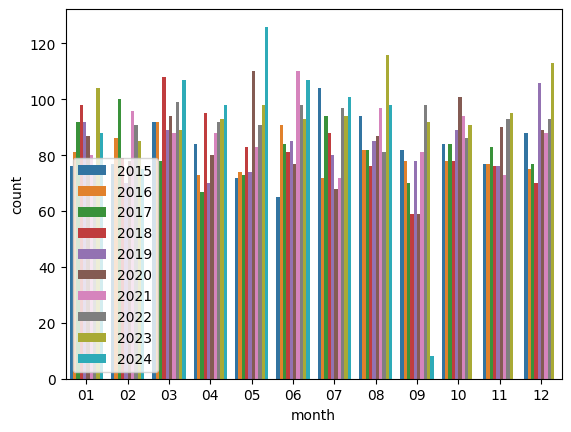

In [42]:
sns.countplot(data=data,x='month', hue='year')
plt.legend(loc='lower left')

It look like there is a lot of variation, each month, from year to year. There is also a lot of variation with in each year. May and June are among the highest in some years, and among the lowest in other years. March was really bad one year, but about average other years. Actually, as shown in the previous chart, March is the deadliest of all months. Beware the ides of March!

Maybe it would be easier to see the monthly data for each year:

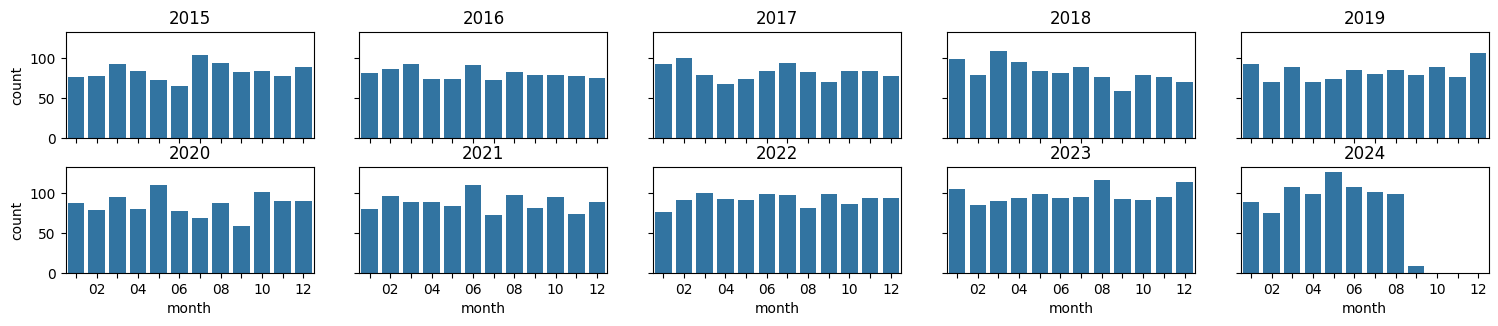

In [43]:
df15 = data[data['year']=='2015']
df16 = data[data['year']=='2016']
df17 = data[data['year']=='2017']
df18 = data[data['year']=='2018']
df19 = data[data['year']=='2019']
df20 = data[data['year']=='2020']
df21 = data[data['year']=='2021']
df22 = data[data['year']=='2022']
df23 = data[data['year']=='2023']
df24 = data[data['year']=='2024']

fig, ax = plt.subplots(2, 5, figsize=(15, 3), sharey=True, sharex=True)

# for p in range(8):
#   sns.countplot(data=data[data['year']==str(2015+p)], ax=ax[p],x='month')
#   ax[p].set_title(p+2015)

fig.tight_layout()

ax[0,0].set_title('2015')
ax[0,1].set_title('2016')
ax[0,2].set_title('2017')
ax[0,3].set_title('2018')
ax[0,4].set_title('2019')
ax[1,0].set_title('2020')
ax[1,1].set_title('2021')
ax[1,2].set_title('2022')
ax[1,3].set_title('2023')
ax[1,4].set_title('2024')

# for a in ax.flat:
#     a.set(xlabel='x-label', ylabel='y-label')

plot1 = sns.countplot(data=df15, ax=ax[0,0],x='month')
for label in plot1.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plot2 = sns.countplot(data=df16, ax=ax[0,1],x='month')
for label in plot2.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot3 = sns.countplot(data=df17, ax=ax[0,2],x='month')
for label in plot3.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot4 = sns.countplot(data=df18, ax=ax[0,3],x='month')
for label in plot4.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot5 = sns.countplot(data=df19, ax=ax[0,4],x='month')
for label in plot5.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot6 = sns.countplot(data=df20, ax=ax[1,0],x='month')
for label in plot6.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot7 = sns.countplot(data=df21, ax=ax[1,1],x='month')
for label in plot7.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot8 = sns.countplot(data=df22, ax=ax[1,2],x='month')
for label in plot8.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot9 = sns.countplot(data=df23, ax=ax[1,3],x='month')
for label in plot9.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot10 = sns.countplot(data=df24, ax=ax[1,4],x='month')
for label in plot10.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)


A few things stand out to me with this presentation. First, there really is a peak in June or July most years. I have this image of a long hot summer leading to social unrest, violence, and conflict... but June/July seems early for a long hot summer. What gives?

Also, what's with march madness? In some years, March is a local maxima. WTF? Cabin fever?

This leads to some further questions to look at: state by month: when it gets HOT in the summer, are there more shootings? When it gets COLD in the winter, are there more shootings?


#### Now let's look at the data by age

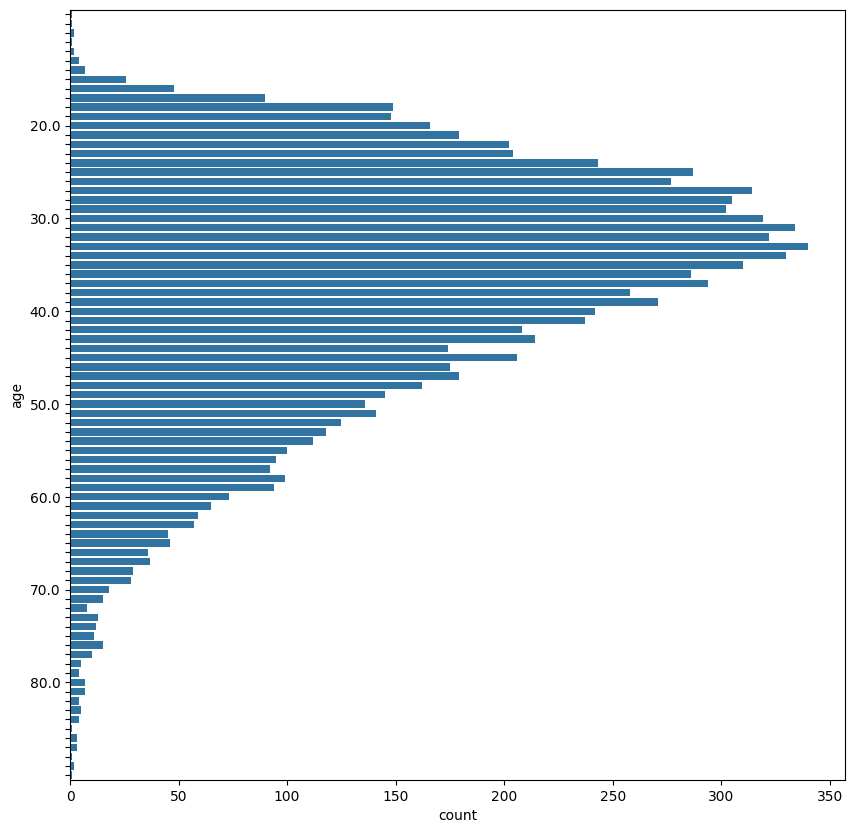

In [44]:
plt.figure(figsize=(10,10))
#sns.countplot(data=data[data['gender']=='F'],y='age')
plot = sns.countplot(data=data,y='age')
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
for label in plot.get_yticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

It is not a surprise that the peak age of police shooting victims is in the early twenties. I am a bit surprised that the numbers are so high well into the thirties.
In terms of absolute numbers, that's where the action is: 20-40 year old (men?) are the overwhelming majority of victims of police shootings.
But...
I don't even know how to think about the non-zero data for six year olds. Oh, wait. its not one. There are TWO six year olds in this database.
UPDATE 2024: This database now includes some additional pre-teens:
- Clesslynn Jane Crawford, age 2
- Terrell Marshawn Miller, age 4
- Jeremy Mardis, age 6
- Kameron Christopher Prescott, age 6
- Fanta Bility, age 8
- Ciara Meyer, age 12
- Thomas Joseph Siderio Jr., age 12
- then there's a bunch of thirteen year olds, and even more 14 year olds
- and so on

And what's with all the sixty year olds? I guess I hope when I am sixty-something I will be spry and agile, and may look threatening enough to justify ... no never mind... forget I said that. But what about all the seventy year olds? and the eighty year olds? Ninety one?




### OK, what about gender?

Let's look at the age histogram, and seperate shootings by gender.

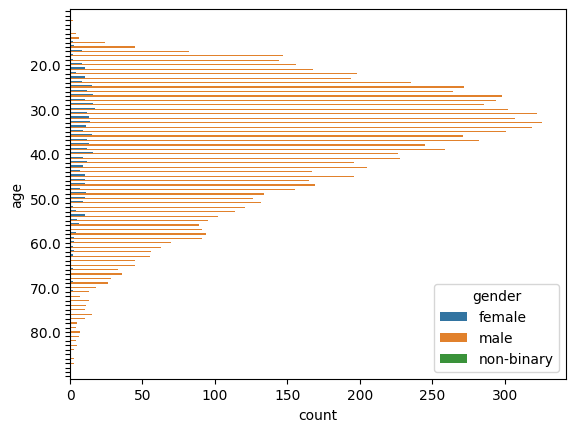

In [45]:
plot = sns.countplot(data=data,y='age',hue='gender')
#plot.yaxis.set_major_locator(ticker.LinearLocator(10))
#new_ticks = [i.get_text() for i in plot.get_xticklabels()]
#plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
for label in plot.get_yticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

### woah

Lets look at the age histogram, seperated by gender, side by side.

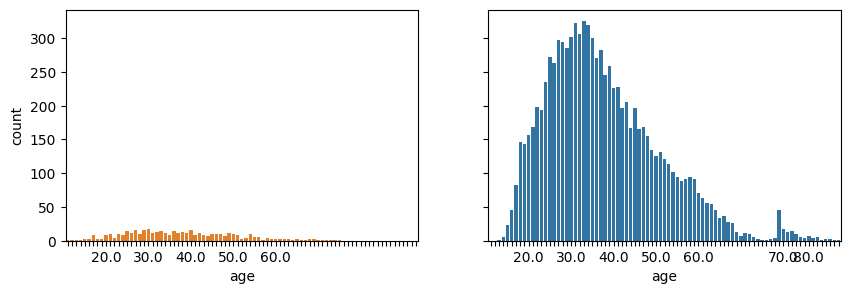

In [56]:
dfF = data[data['gender']=='female']
dfM = data[data['gender']=='male']
_, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True,sharex=True)

plot0 = sns.countplot(data=dfF, ax=ax[0],x='age')
plot0.get_xticklabels()

plot1 = sns.countplot(data=dfF, ax=ax[0],x='age')
for label in plot1.get_xticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plot2 = sns.countplot(data=dfM, ax=ax[1],x='age')
for label in plot2.get_xticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

So... apparently police shootings have a gender bias. Maybe. I'm just spitballing here.

---



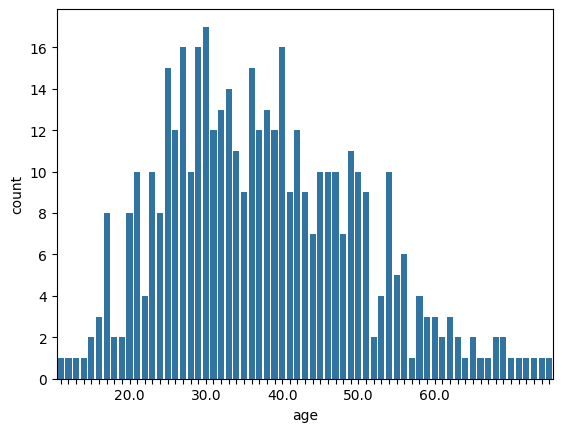

In [59]:
plot = sns.countplot(data=dfF,x='age')
for label in plot.get_xticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

To state the obvious, notice how much more evenly distributed the age histogram is. Being a YOUNG woman isn't nearly as dangerous as being a young man. This is not to say that any of these shootings are more or less tragic. The fact that middle-aged women are killed by police at about the same rate as young women can not be spun as a good-news story! Notice that the Y-axis is numbered in one and two digit numbers...

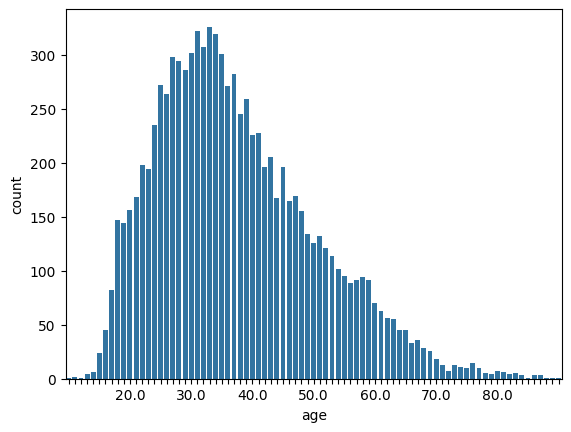

In [60]:
plot = sns.countplot(data=dfM,x='age')
for label in plot.get_xticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

... but the Y-axis here is triple-digits.


In [49]:
data['age'].value_counts().sort_index()

,count
age,
2.0,1
4.0,1
6.0,2
8.0,1
12.0,2
...,...
86.0,3
88.0,3
89.0,1


## Mental Illness
What does the signs_of_mental_illness field tell us?

In [61]:
data['was_mental_illness_related'].value_counts()

,count
was_mental_illness_related,
False,8079
True,1980


<Axes: xlabel='was_mental_illness_related', ylabel='count'>

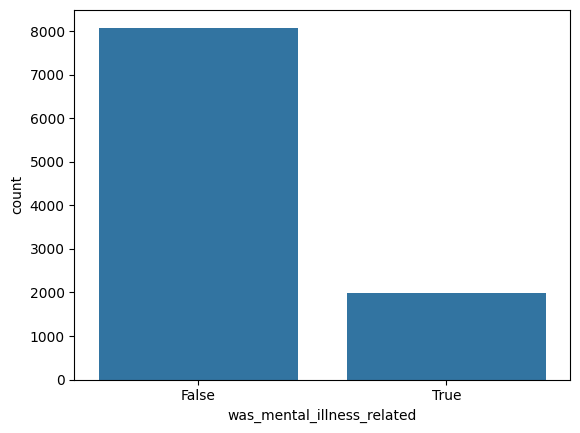

In [62]:
sns.countplot(data=data,x='was_mental_illness_related')

Or, more easily interpretable:

([<matplotlib.patches.Wedge at 0x7b59eb179030>,
 [Text(-0.8962961053083609, 0.6376937286888307, ''),
  Text(0.896296045603161, -0.6376938126061256, '')])

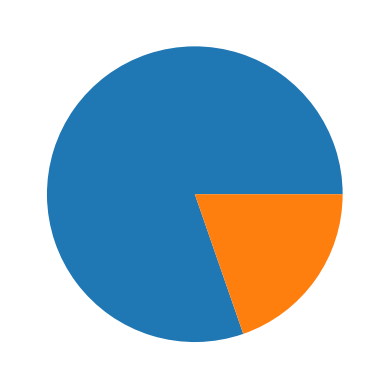

In [63]:
plt.pie(data['was_mental_illness_related'].value_counts())
#plt.title('Relative Feature Importance')

A first observation: nearly a fifth of all shooting victims show signs of mental illness. It would be interesting to compare this to the general population. My suspicion is that signs of mental illness appear in shooting victims at a (much) higher rate than the population at large.